In [475]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


## Some EDA

In [476]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [477]:
df = pd.DataFrame(data=np.concatenate((data.data, np.array([data.target]).T), axis=1), columns=data.feature_names + ['target'])
target_map = {0.0: "setosa", 1.0: "versicolor", 2.0: "virginica"}
df['target']=df['target'].map(target_map)


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [479]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,virginica


As we can see there is 1 duplicated sample but since the dataset itself is pretty clean and relatively small (150 rows) i will leave this one in the dataset. 

In [480]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

This dataset is extremely clean and doesn't have any missing values! This dataset may be called "hello world" of ML :)

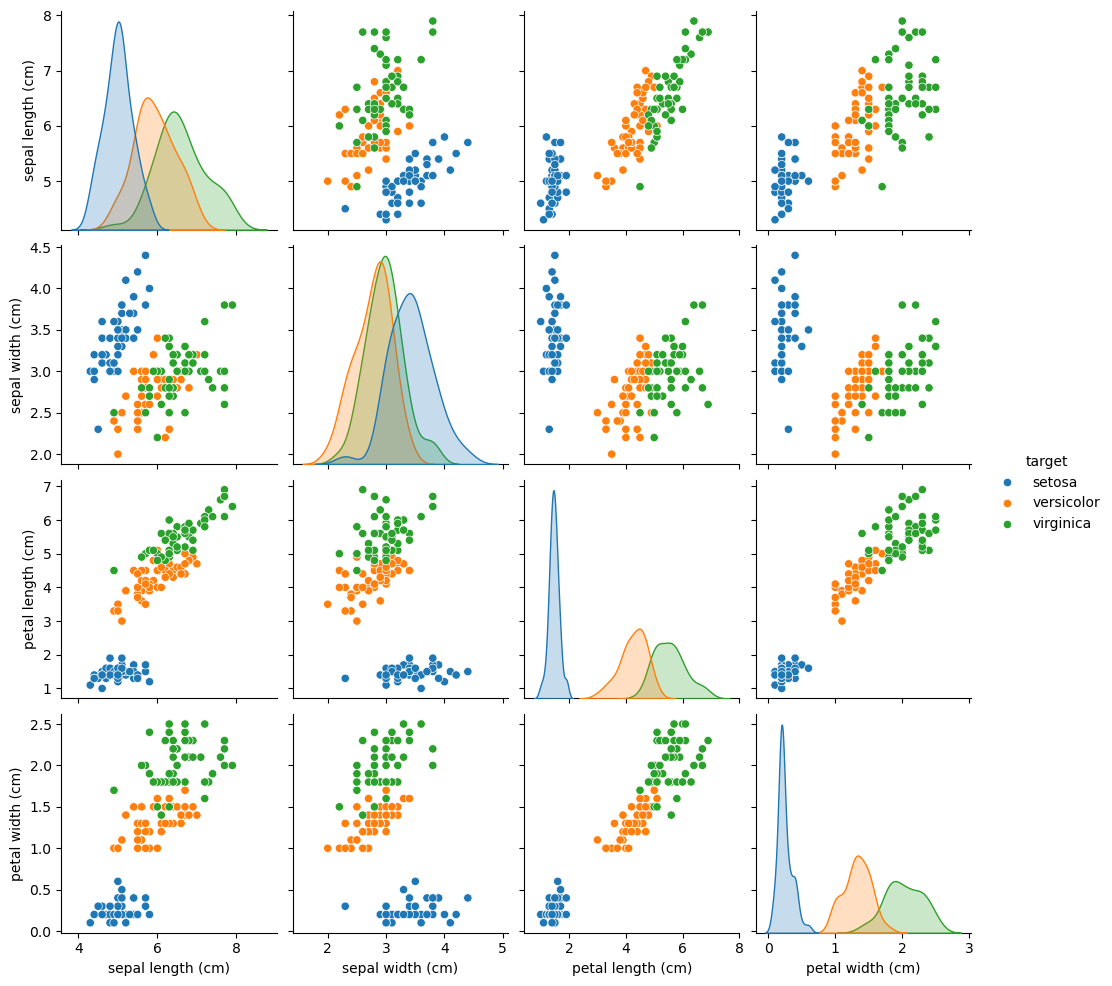

In [481]:
sns.pairplot(data=df, kind='scatter', diag_kind='kde', hue="target")

From the plots drawn here we can see, that kde(kernel density estimate) we can see, that petal width and petal length are very important features, because they allow us to separate "setosa" species instantly, and "versicolor" vs "virginica" got some intersection with their kde's but they are still seperable.

#### Now lets try to figure out what other features can be useful for us

<Axes: >

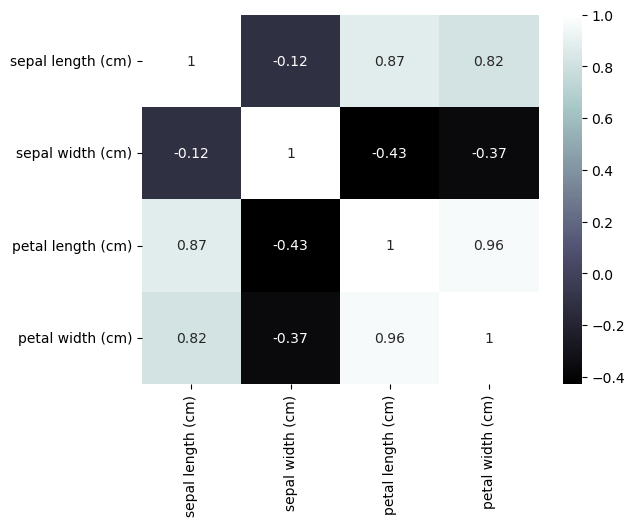

In [482]:
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap='bone')

We can see that sepal width is correlating with other features the least. From previous plots we can see that its kde plot is stacked too. This feature is not important to us, as other, but i will test models on all 4 features and compare them to models trained on 3 features exculding "sepal width".

## ML 

In [483]:
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn.tree import DecisionTreeClassifier 

In [484]:
train, test = train_test_split(df, test_size=0.2)
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
test_X   = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

### Logistic Regression

In [485]:
LogRegClf = LogisticRegression(verbose=1)
LogRegClf.fit(train_X, train_y)
predictions = LogRegClf.predict(test_X)
acc_score = metrics.accuracy_score(y_true=test_y, y_pred=predictions)
print("accuracy score is:", acc_score)

accuracy score is: 1.0


z:\python\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


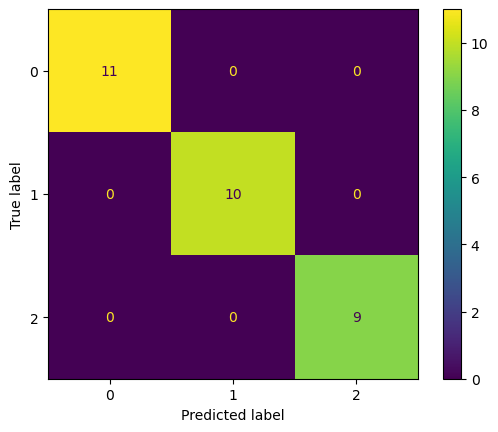

In [486]:
cm = metrics.confusion_matrix(y_true=test_y, y_pred=predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()


Accuracy of this model depends a lot on the train_test_split. With different test_size ratios model is having different accuracy score. Tho its pretty high and typically is in range [0.9; 1]

### SVM (support vector machine)

In [487]:
svc = svm.SVC()
svc.fit(X=train_X, y=train_y)
predictions = svc.predict(X=test_X)
acc_score = metrics.accuracy_score(y_pred=predictions, y_true=test_y)
print("accuracy score is:", acc_score)

accuracy score is: 1.0


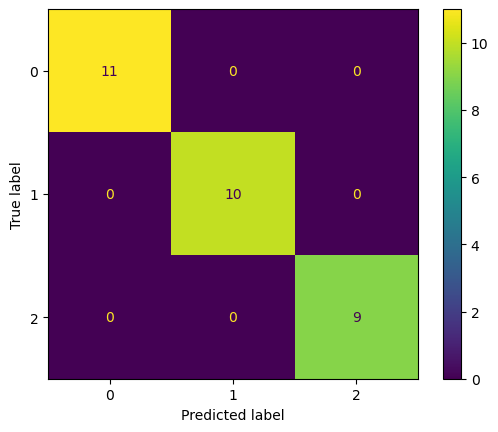

In [488]:
cm = metrics.confusion_matrix(y_true=test_y, y_pred=predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

### KNN (k nearest neighbours classifier)

In [489]:
n = list(range(1,10))
acc_scores = []
for n_neighbours in n:
    knnc = KNeighborsClassifier(n_neighbors=n_neighbours)
    knnc.fit(X=train_X, y=train_y)
    predictions = knnc.predict(X=test_X)
    acc_score = metrics.accuracy_score(y_true=test_y, y_pred=predictions)
    acc_scores.append(acc_score)

print("highest accuracy score:", max(acc_scores), "with", n[np.argmax(acc_scores)], "neighbours")

highest accuracy score: 1.0 with 5 neighbours


if the accuracy scores are same for several neighbours argmax will return first occurance. And since we are iterating on list made by range, numbers of neighbours are in ascending order, so first occurance is always the smallest n possible.

### Decision tree

In [490]:
treeclf = DecisionTreeClassifier()
treeclf.fit(X=train_X, y=train_y)
predictions = treeclf.predict(X=test_X)
acc_score = metrics.accuracy_score(y_true=test_y, y_pred=predictions)
print("accuracy score is:", acc_score)

accuracy score is: 1.0


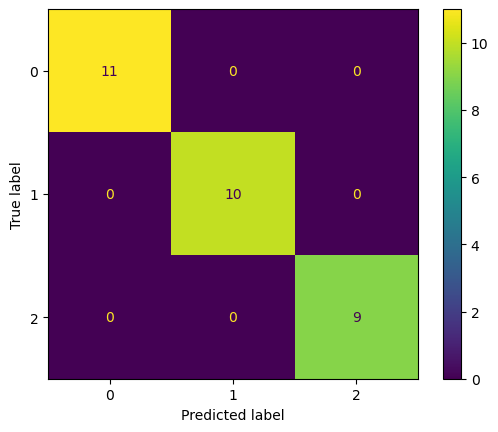

In [491]:
cm = metrics.confusion_matrix(y_true=test_y, y_pred=predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

#### Chapter conclusion

As we can see, all of our models have very high accuracy scores. This is due to dataset being too clean, and due to how easy it is to distinguish some of the species based on some of the features. 

Lets analyse what will happen if we will exclude one feature, that i don't think is that important.

In [492]:
train, test = train_test_split(df.iloc[:, [0,2,3,4]], test_size=0.2)
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
test_X   = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

### Log Reg (logistic regression)

In [493]:
LogRegClf = LogisticRegression(verbose=1)
LogRegClf.fit(train_X, train_y)
predictions = LogRegClf.predict(test_X)
acc_score = metrics.accuracy_score(y_true=test_y, y_pred=predictions)
print("accuracy score is:", acc_score)

accuracy score is: 0.9666666666666667


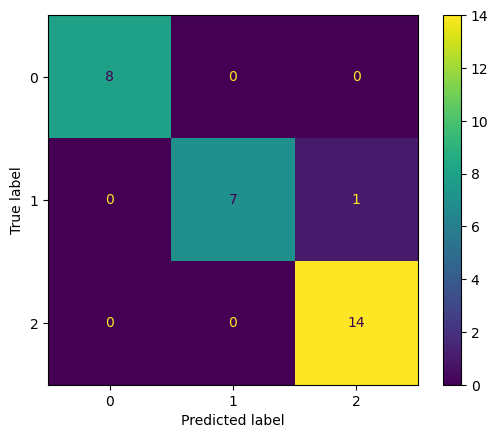

In [494]:
cm = metrics.confusion_matrix(y_true=test_y, y_pred=predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

### SVM

In [495]:
svc = svm.SVC()
svc.fit(X=train_X, y=train_y)
predictions = svc.predict(X=test_X)
acc_score = metrics.accuracy_score(y_pred=predictions, y_true=test_y)
print("accuracy score is:", acc_score)

accuracy score is: 0.9666666666666667


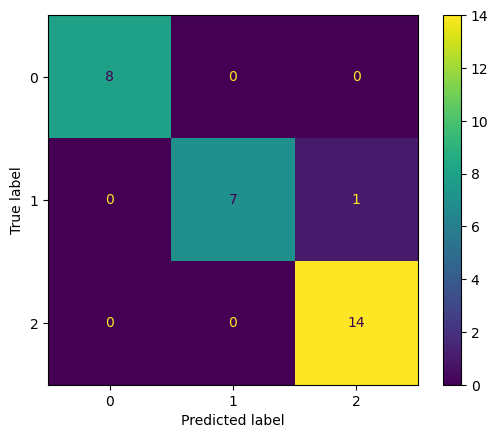

In [496]:
cm = metrics.confusion_matrix(y_true=test_y, y_pred=predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

### KNN

In [497]:
n = list(range(1,10))
acc_scores = []
for n_neighbours in n:
    knnc = KNeighborsClassifier(n_neighbors=n_neighbours)
    knnc.fit(X=train_X, y=train_y)
    predictions = knnc.predict(X=test_X)
    acc_score = metrics.accuracy_score(y_true=test_y, y_pred=predictions)
    acc_scores.append(acc_score)

print("highest accuracy score:", max(acc_scores), "with", n[np.argmax(acc_scores)], "neighbours")

highest accuracy score: 1.0 with 3 neighbours


### Decision tree

In [498]:
treeclf = DecisionTreeClassifier()
treeclf.fit(X=train_X, y=train_y)
predictions = treeclf.predict(X=test_X)
acc_score = metrics.accuracy_score(y_true=test_y, y_pred=predictions)
print("accuracy score is:", acc_score)

accuracy score is: 0.9333333333333333


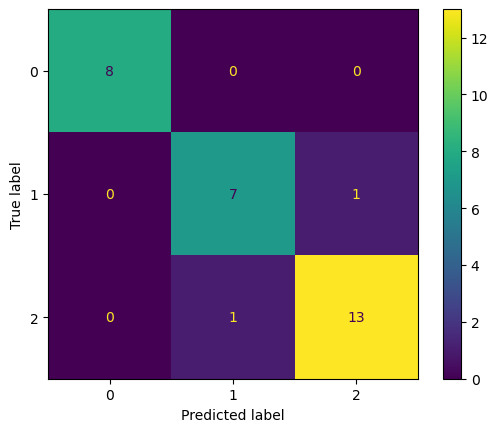

In [499]:
cm = metrics.confusion_matrix(y_true=test_y, y_pred=predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

# Overall conclusion

So... This dataset itself is pretty clean, and the data here is very distinguishable. All of the algorithms i used showed high accuracy because of said earlier.

When i decided to drop one feature and decided to do a test of 5 runs and compare accuracies i understood, that accuracy didn't drop that much, and in some cases it didn't drop at all! 
So i got rid of a feature without losing information therefore i decreased dimensionality of this dataset. 

I can't say that some of the models are better than other, cause it's just not true. All of them are good if they are used with the right data.
